# An√°lisis de Subjetividad de Opiniones Tur√≠sticas

Este notebook realiza un an√°lisis de subjetividad sobre las opiniones tur√≠sticas recopiladas utilizando modelos preentrenados de HuggingFace para evaluar si el texto expresa opiniones subjetivas o informaci√≥n objetiva.

## Objetivos:
- Cargar dataset de una ciudad espec√≠fica
- Aplicar modelo preentrenado de HuggingFace para an√°lisis de subjetividad
- Clasificar texto en dos categor√≠as: Subjetivo vs Objetivo
- Generar estad√≠sticas descriptivas de la subjetividad
- Mostrar ejemplos representativos de cada categor√≠a
- Crear visualizaciones del an√°lisis

## Modelo utilizado:
- **GroNLP/mdebertav3-subjectivity-multilingual**: Modelo multiling√ºe especializado en an√°lisis de subjetividad

In [1]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar los m√≥dulos de an√°lisis de subjetividad (nueva estructura modular)
import sys
sys.path.append('../scripts')
from subjetividad import (
    AnalizadorHuggingFaceSubjetividad,
    VisualizadorSubjetividad
)

# Configuraci√≥n de visualizaci√≥n
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("‚úÖ Librer√≠as importadas correctamente")
print("‚úÖ M√≥dulo de an√°lisis de subjetividad cargado (nueva estructura modular)")
print("üìÅ Usando: subjetividad/analizador_huggingface_subjetividad.py")

‚úÖ Librer√≠as importadas correctamente
‚úÖ M√≥dulo de an√°lisis de subjetividad cargado (nueva estructura modular)
üìÅ Usando: subjetividad/analizador_huggingface_subjetividad.py


In [2]:
# Cargar dataset de una ciudad espec√≠fica
dataset_path = '../data/processed/datasets_por_ciudad/dataset_cdmx.csv'

# Cargar los datos
df = pd.read_csv(dataset_path)
print(f"üìä Dataset cargado: {dataset_path}")
print(f"üìà Dimensiones: {df.shape}")
print(f"üèôÔ∏è  Ciudad: {df['Ciudad'].iloc[0] if 'Ciudad' in df.columns else 'No especificada'}")
print(f"üìù Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

# Mostrar las primeras filas
display(df.head())

üìä Dataset cargado: ../data/processed/datasets_por_ciudad/dataset_cdmx.csv
üìà Dimensiones: (614, 10)
üèôÔ∏è  Ciudad: Cdmx
üìù Columnas disponibles:
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview


Titulo  \
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO   
1                           Hermoso üíö   
2                       S√© consciente   
3   Bicicleta dominical en la Reforma   
4                       Bella avenida   

                                              Review  TipoViaje  Calificacion  \
0  Avenida Ciudad de M√©xico. Es mucho tiempo as√≠ ...  Solitario             5   
1  Es hermoso su paisaje y recorrerlo, lo malo so...     Pareja             5   
2  La foto de la entrada no coincide con esta ubi...  Solitario             5   
3  Est√° cerrado a los coches el domingo, as√≠ que ...     Pareja             5   
4  M√©xico sin duda un excelente destino de vacaci...    Familia             4   

                     OrigenAutor FechaOpinion FechaEstadia Ciudad  \
0                        anonimo   2025-09-01   2025-08-01   Cdmx   
1  Santiago de Quer√©taro, M√©xico   2025-05-30   2025-05-01   Cdmx   
2                     Dallas, TX   2025-04-01   2025-04-01   Cdmx   
3                        Grenada   2025-03-18   2025-03-01   Cdmx   
4                        anonimo   2025-03-13   2025-02-01   Cdmx   

             Atraccion                                       TituloReview  
0  Paseo De La Reforma  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...  
1  Paseo De La Reforma  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...  
2  Paseo De La Reforma  S√© consciente La foto de la entrada no coincid...  
3  Paseo De La Reforma  Bicicleta dominical en la Reforma Est√° cerrado...  
4  Paseo De La Reforma  Bella avenida M√©xico sin duda un excelente des...

In [3]:
# Verificar e instalar transformers si es necesario
print("üì¶ Verificando librer√≠as necesarias para HuggingFace...")

try:
    import transformers
    print("‚úÖ Transformers ya est√° instalado")
    print(f"üìç Versi√≥n: {transformers.__version__}")
except ImportError:
    print("‚è≥ Instalando transformers...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers[torch]"])
    print("‚úÖ Transformers instalado exitosamente")

üì¶ Verificando librer√≠as necesarias para HuggingFace...
‚úÖ Transformers ya est√° instalado
üìç Versi√≥n: 4.56.0


In [4]:
# Inicializar el analizador de subjetividad con modelo espec√≠fico
print("ü§ñ Inicializando analizador de subjetividad con HuggingFace...")
print("üìã Modelo seleccionado: GroNLP/mdebertav3-subjectivity-multilingual")
print("üåç Caracter√≠sticas del modelo:")
print("   ‚Ä¢ Multiling√ºe (incluye espa√±ol)")
print("   ‚Ä¢ Especializado en an√°lisis de subjetividad")
print("   ‚Ä¢ Basado en DeBERTa v3")
print("   ‚Ä¢ Optimizado para textos de opiniones")

# Crear el analizador con el modelo espec√≠fico
analizador = AnalizadorHuggingFaceSubjetividad(
    modelo_nombre="GroNLP/mdebertav3-subjectivity-multilingual"
)

# Cargar el modelo
exito = analizador.cargar_modelo()

if exito:
    print("\nüéØ INFORMACI√ìN DEL MODELO CARGADO:")
    print("   ‚Ä¢ Tipo: Clasificaci√≥n de texto (subjetividad)")
    print("   ‚Ä¢ Categor√≠as: Subjetivo vs Objetivo")
    print("   ‚Ä¢ Entrada: Texto en m√∫ltiples idiomas")
    print("   ‚Ä¢ Salida: Probabilidades para cada categor√≠a")
    print("üìÅ Usando: AnalizadorHuggingFaceSubjetividad (nueva estructura modular)")
else:
    print("‚ùå No se pudo cargar el modelo de HuggingFace")
    print("üí° Verifica la conexi√≥n a internet y el nombre del modelo")

ü§ñ Inicializando analizador de subjetividad con HuggingFace...
üìã Modelo seleccionado: GroNLP/mdebertav3-subjectivity-multilingual
üåç Caracter√≠sticas del modelo:
   ‚Ä¢ Multiling√ºe (incluye espa√±ol)
   ‚Ä¢ Especializado en an√°lisis de subjetividad
   ‚Ä¢ Basado en DeBERTa v3
   ‚Ä¢ Optimizado para textos de opiniones
ü§ñ Cargando modelo de subjetividad: GroNLP/mdebertav3-subjectivity-multilingual
‚è≥ Esto puede tomar unos momentos la primera vez...


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/412 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cpu


‚úÖ Modelo cargado exitosamente
üåç Modelo: GroNLP/mdebertav3-subjectivity-multilingual
üìã Especializado en: An√°lisis de subjetividad multiling√ºe

üéØ INFORMACI√ìN DEL MODELO CARGADO:
   ‚Ä¢ Tipo: Clasificaci√≥n de texto (subjetividad)
   ‚Ä¢ Categor√≠as: Subjetivo vs Objetivo
   ‚Ä¢ Entrada: Texto en m√∫ltiples idiomas
   ‚Ä¢ Salida: Probabilidades para cada categor√≠a
üìÅ Usando: AnalizadorHuggingFaceSubjetividad (nueva estructura modular)


In [5]:
# Probar el modelo con algunos ejemplos manuales antes del an√°lisis completo
print("üß™ PRUEBAS DEL MODELO CON EJEMPLOS MANUALES")
print("=" * 60)

# Ejemplos de prueba
ejemplos_prueba = [
    "Me encant√≥ este lugar, es incre√≠ble y lo recomiendo mucho",
    "El museo abre de 9:00 AM a 6:00 PM todos los d√≠as",
    "Qu√© experiencia tan horrible, no vuelvo nunca m√°s",
    "La entrada cuesta 150 pesos por persona",
    "Excelente atenci√≥n al cliente, muy amables todos"
]

print("üìù Analizando ejemplos de prueba:")
print("-" * 60)

for i, ejemplo in enumerate(ejemplos_prueba, 1):
    resultado = analizador.analizar_subjetividad_texto(ejemplo)
    categoria = resultado['categoria']
    probabilidades = resultado['probabilidades']
    
    print(f"\nüîç Ejemplo {i}:")
    print(f"   üìù Texto: \"{ejemplo}\"")
    print(f"   üè∑Ô∏è Categor√≠a: {categoria}")
    
    # Mostrar probabilidades si est√°n disponibles
    if probabilidades:
        print(f"   üìä Probabilidades:")
        for prob in probabilidades:
            etiqueta = prob.get('label', 'Unknown')
            score = prob.get('score', 0) * 100
            print(f"      ‚Ä¢ {etiqueta}: {score:.1f}%")

print("\n‚úÖ Pruebas del modelo completadas")
print("üöÄ El modelo est√° funcionando correctamente")

üß™ PRUEBAS DEL MODELO CON EJEMPLOS MANUALES
üìù Analizando ejemplos de prueba:
------------------------------------------------------------

üîç Ejemplo 1:
   üìù Texto: "Me encant√≥ este lugar, es incre√≠ble y lo recomiendo mucho"
   üè∑Ô∏è Categor√≠a: Subjetivo
   üìä Probabilidades:
      ‚Ä¢ LABEL_0: 2.6%
      ‚Ä¢ LABEL_1: 97.4%

üîç Ejemplo 1:
   üìù Texto: "Me encant√≥ este lugar, es incre√≠ble y lo recomiendo mucho"
   üè∑Ô∏è Categor√≠a: Subjetivo
   üìä Probabilidades:
      ‚Ä¢ LABEL_0: 2.6%
      ‚Ä¢ LABEL_1: 97.4%

üîç Ejemplo 2:
   üìù Texto: "El museo abre de 9:00 AM a 6:00 PM todos los d√≠as"
   üè∑Ô∏è Categor√≠a: Subjetivo
   üìä Probabilidades:
      ‚Ä¢ LABEL_0: 98.9%
      ‚Ä¢ LABEL_1: 1.1%

üîç Ejemplo 2:
   üìù Texto: "El museo abre de 9:00 AM a 6:00 PM todos los d√≠as"
   üè∑Ô∏è Categor√≠a: Subjetivo
   üìä Probabilidades:
      ‚Ä¢ LABEL_0: 98.9%
      ‚Ä¢ LABEL_1: 1.1%

üîç Ejemplo 3:
   üìù Texto: "Qu√© experiencia tan horrible, no vuelvo n

In [6]:
# Aplicar an√°lisis de subjetividad al dataset completo
print("üöÄ Iniciando an√°lisis de subjetividad en dataset completo...")
print("‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-15 minutos dependiendo del hardware")
print(f"üìä Total de registros a procesar: {len(df)}")

# Procesar el dataset completo
df_con_subjetividad = analizador.procesar_dataset_completo(df, 'TituloReview')

print(f"\n‚úÖ An√°lisis de subjetividad completado")
print(f"üìä Dataset ahora contiene {len(df_con_subjetividad.columns)} columnas")
print(f"üÜï Nueva columna agregada: 'SubjetividadHF'")

# Mostrar una muestra del resultado
print("\n" + "="*80)
print("MUESTRA DEL DATASET CON AN√ÅLISIS DE SUBJETIVIDAD")
print("="*80)
display(df_con_subjetividad[['TituloReview', 'Calificacion', 'SubjetividadHF']].head(10))

üöÄ Iniciando an√°lisis de subjetividad en dataset completo...
‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-15 minutos dependiendo del hardware
üìä Total de registros a procesar: 614
üöÄ Iniciando an√°lisis de subjetividad en dataset completo...
üìä Total de registros a procesar: 614
üì¶ Procesando lote 1/13 (registros 1-50)
üì¶ Procesando lote 2/13 (registros 51-100)
üì¶ Procesando lote 2/13 (registros 51-100)
üì¶ Procesando lote 3/13 (registros 101-150)
üì¶ Procesando lote 3/13 (registros 101-150)
üì¶ Procesando lote 4/13 (registros 151-200)
üì¶ Procesando lote 4/13 (registros 151-200)
üì¶ Procesando lote 5/13 (registros 201-250)
üì¶ Procesando lote 5/13 (registros 201-250)
üì¶ Procesando lote 6/13 (registros 251-300)
üì¶ Procesando lote 6/13 (registros 251-300)
üì¶ Procesando lote 7/13 (registros 301-350)
üì¶ Procesando lote 7/13 (registros 301-350)
üì¶ Procesando lote 8/13 (registros 351-400)
üì¶ Procesando lote 8/13 (registros 351-400)
üì¶ Procesando lote 9/13 (reg

TituloReview  Calificacion  \
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...             5   
1  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...             5   
2  S√© consciente La foto de la entrada no coincid...             5   
3  Bicicleta dominical en la Reforma Est√° cerrado...             5   
4  Bella avenida M√©xico sin duda un excelente des...             4   
5  Camin√© por parte de esta calle un domingo cuan...             3   
6  "Caminata agradable" El Paseo de la Reforma es...             4   
7  Caminata Es una calle que disfrutas desde que ...             5   
8  Me gust√≥ venir Es una avenida llena de comerci...             5   
9  Muy disfrutable avenida Preciosa avenida paa r...             5   

  SubjetividadHF  
0      Subjetivo  
1      Subjetivo  
2      Subjetivo  
3      Subjetivo  
4      Subjetivo  
5      Subjetivo  
6      Subjetivo  
7      Subjetivo  
8      Subjetivo  
9      Subjetivo

In [7]:
# Generar y mostrar estad√≠sticas descriptivas de la subjetividad
estadisticas = analizador.obtener_estadisticas_subjetividad(df_con_subjetividad)

# Mostrar estad√≠sticas en consola
analizador.mostrar_estadisticas_consola(estadisticas)

# Mostrar tabla detallada por atracci√≥n
print("\nüéØ SUBJETIVIDAD POR ATRACCI√ìN TUR√çSTICA (Top 10):")
print("-" * 60)
if 'por_atraccion' in estadisticas and not estadisticas['por_atraccion'].empty:
    display(estadisticas['por_atraccion'].head(10))
else:
    print("No hay datos de atracciones disponibles")

üìä ESTAD√çSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
üî¢ DISTRIBUCI√ìN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 602 registros ( 98.0%)
  Objetivo:  12 registros (  2.0%)

üìà TOTAL DE REGISTROS: 614

üìù DESCRIPCI√ìN DE CATEGOR√çAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, informaci√≥n factual sin opiniones

üéØ SUBJETIVIDAD POR ATRACCI√ìN TUR√çSTICA (Top 10):
------------------------------------------------------------


SubjetividadHF                      Objetivo  Subjetivo
Atraccion                                              
Acuario Michin Ciudad De Mexico            1         73
Basilica De La Virgen Guadalupe            1         67
Jardines Flotantes De Xochimilco           1         68
Mercado De Artesanias La Ciudadela         3         60
Museo Del Templo Mayor                     1         52
Museo Nacional De Antropologia             1         42
Palacio De Bellas Artes                    0         65
Paseo De La Reforma                        1         59
Polanco                                    2         55
Zocalo De La Ciudad De Mexico              1         61

üìà GENERANDO VISUALIZACIONES B√ÅSICAS
üìà GENERANDO VISUALIZACIONES DE SUBJETIVIDAD
‚úÖ Visualizaciones generadas exitosamente
‚úÖ Visualizaciones generadas exitosamente


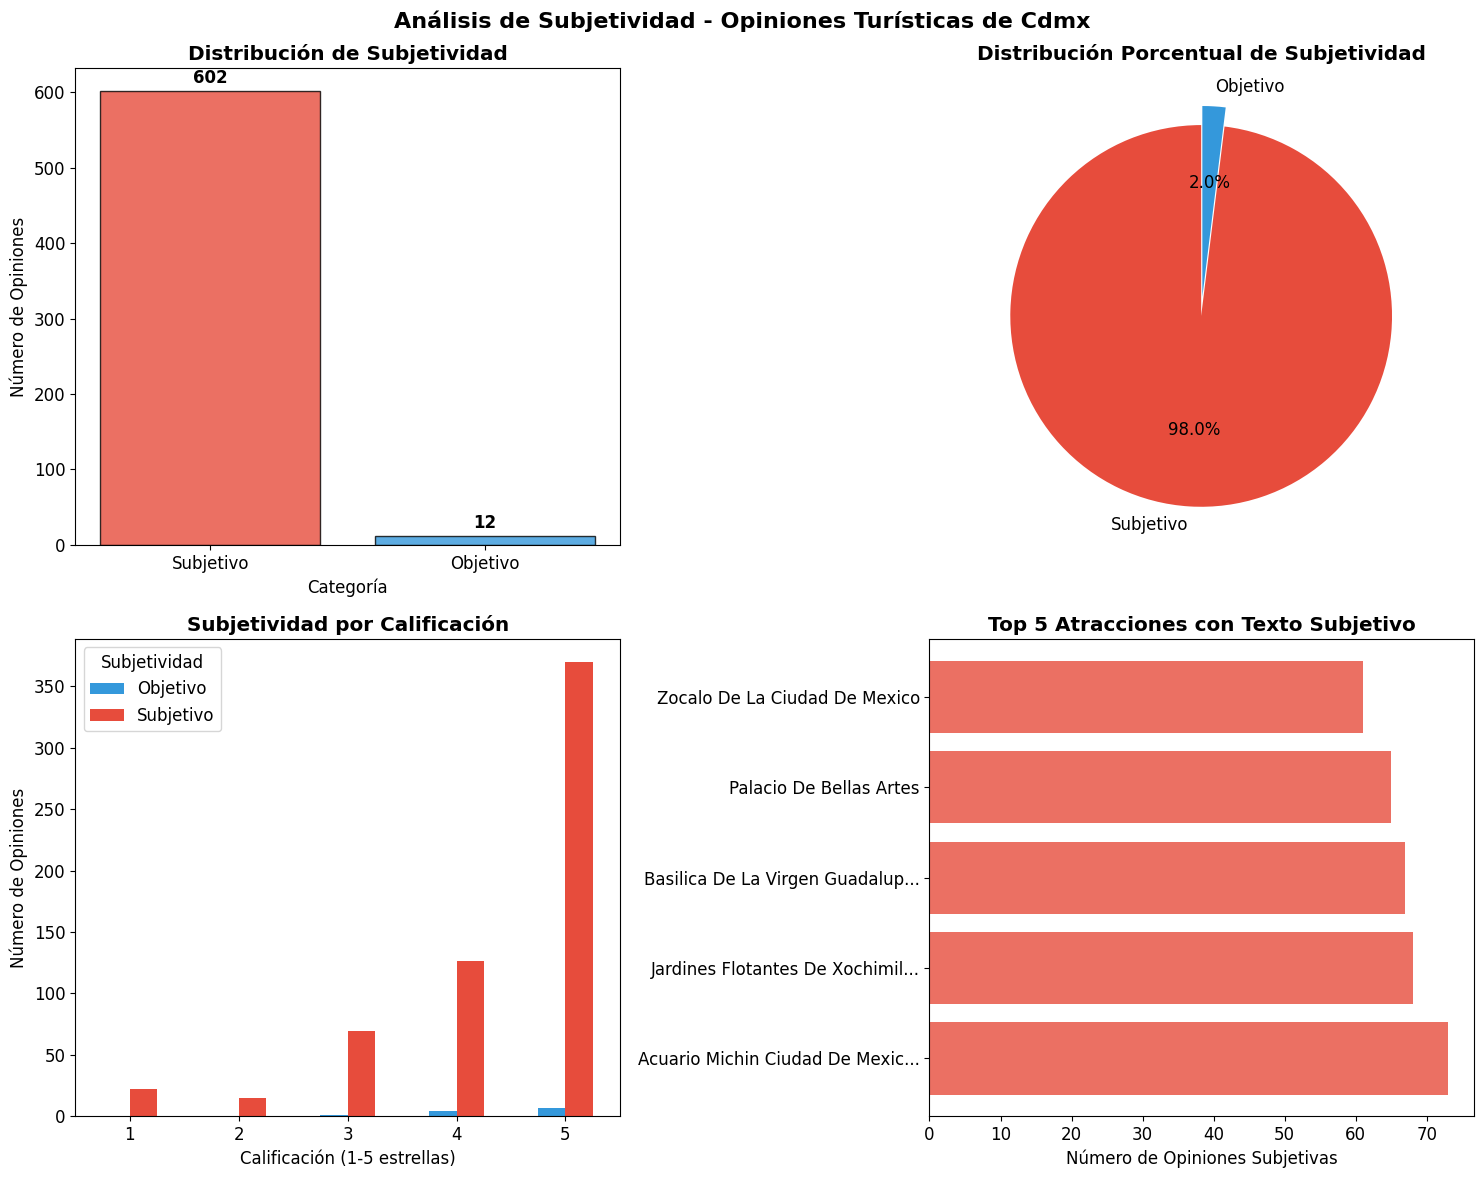

‚úÖ Visualizaciones b√°sicas generadas exitosamente
üìÅ Usando: VisualizadorSubjetividad.crear_visualizaciones_basicas()


In [8]:
# Crear visualizaciones b√°sicas de la subjetividad
print("üìà GENERANDO VISUALIZACIONES B√ÅSICAS")
print("=" * 50)

visualizador = VisualizadorSubjetividad()
ciudad = df_con_subjetividad['Ciudad'].iloc[0] if 'Ciudad' in df_con_subjetividad.columns else "Ciudad de M√©xico"

fig_basicas = visualizador.crear_visualizaciones_basicas(df_con_subjetividad, ciudad)
plt.show()

print("‚úÖ Visualizaciones b√°sicas generadas exitosamente")
print("üìÅ Usando: VisualizadorSubjetividad.crear_visualizaciones_basicas()")

üìä GENERANDO VISUALIZACIONES DETALLADAS
‚úÖ Visualizaciones detalladas generadas exitosamente
‚úÖ Visualizaciones detalladas generadas exitosamente


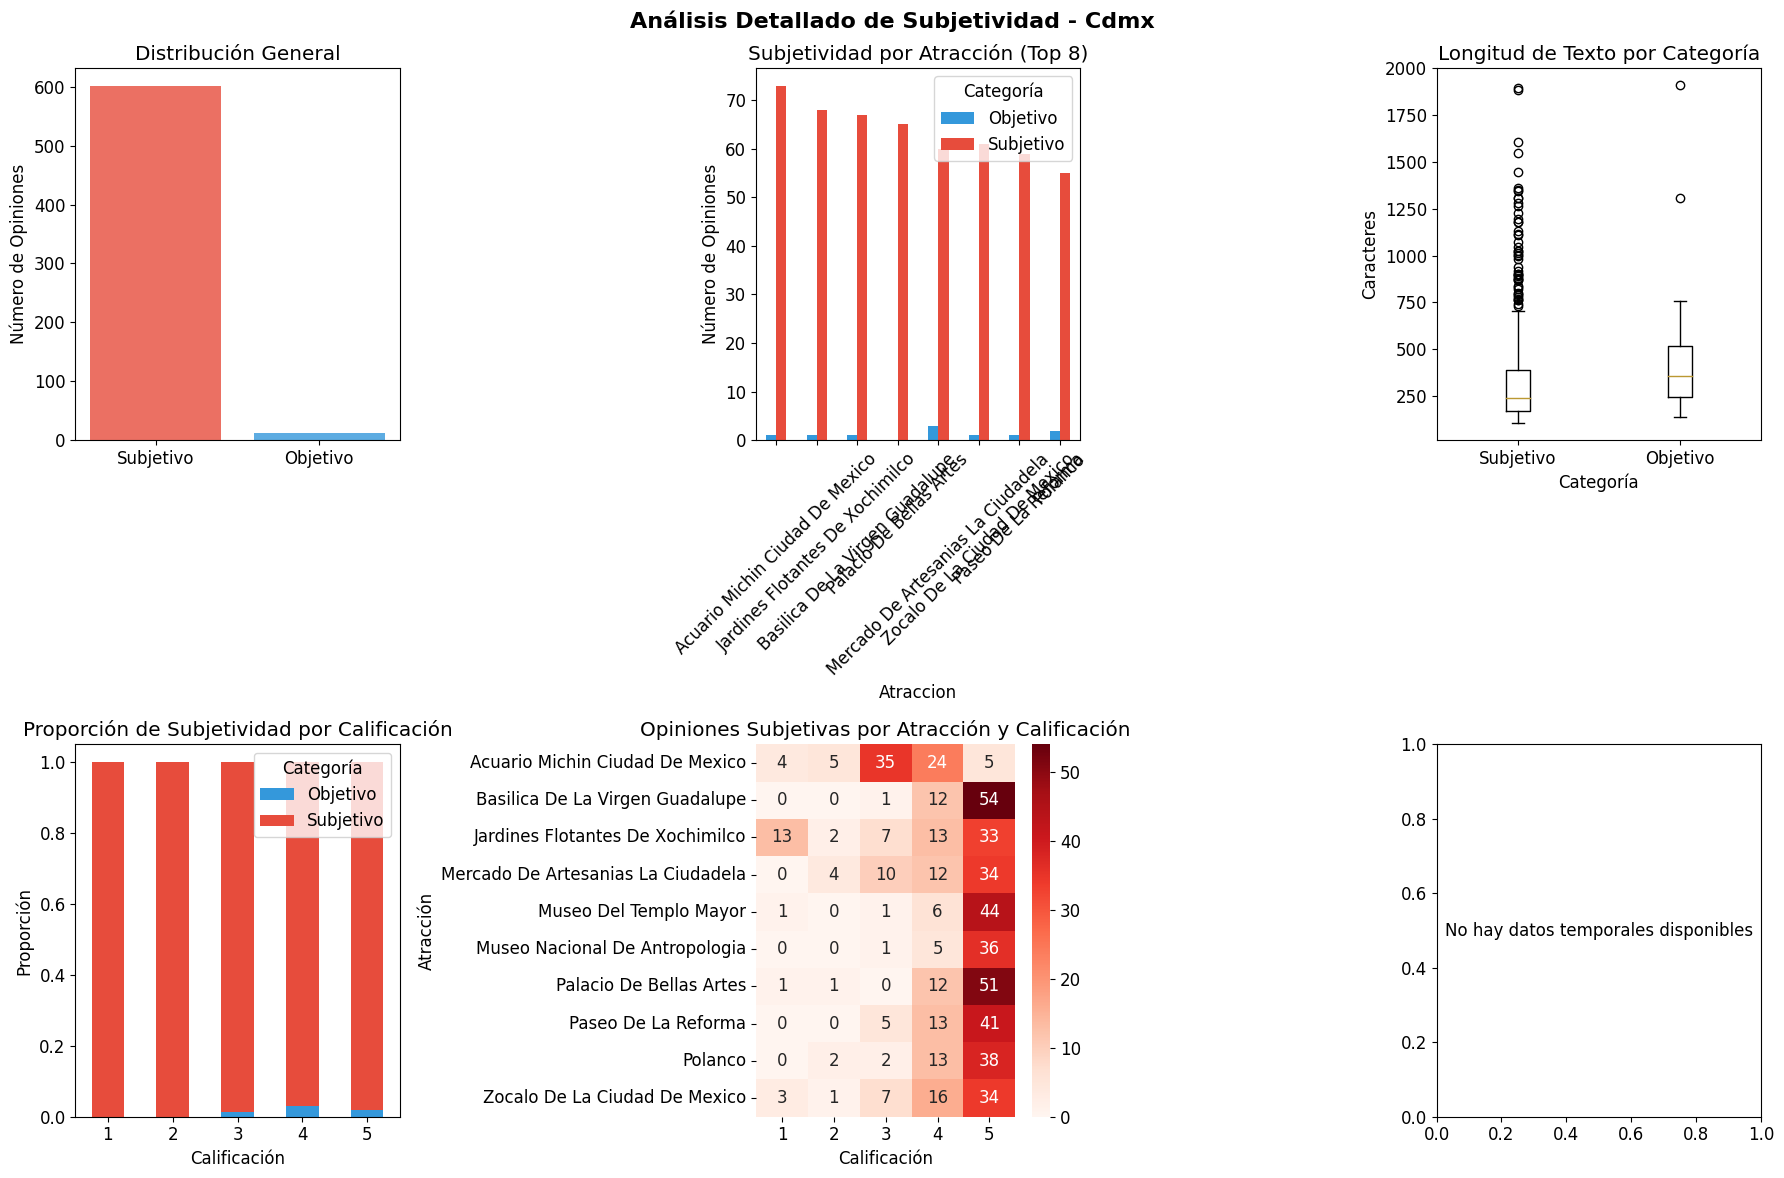

‚úÖ Visualizaciones detalladas generadas exitosamente
üìÅ Usando: VisualizadorSubjetividad.crear_visualizacion_detallada()


In [9]:
# Crear visualizaciones detalladas de la subjetividad
print("üìä GENERANDO VISUALIZACIONES DETALLADAS")
print("=" * 50)

fig_detalladas = visualizador.crear_visualizacion_detallada(df_con_subjetividad, ciudad)
plt.show()

print("‚úÖ Visualizaciones detalladas generadas exitosamente")
print("üìÅ Usando: VisualizadorSubjetividad.crear_visualizacion_detallada()")

In [10]:
# Mostrar ejemplos representativos de texto SUBJETIVO
print("üîç EJEMPLOS DE TEXTO SUBJETIVO")
print("=" * 70)
print("üìù Los siguientes ejemplos muestran opiniones, emociones y evaluaciones personales:")
print()

analizador.mostrar_ejemplos_categoria(
    df_con_subjetividad, 
    categoria='Subjetivo', 
    n_ejemplos=5,
    mostrar_texto_completo=True
)

üîç EJEMPLOS DE TEXTO SUBJETIVO
üìù Los siguientes ejemplos muestran opiniones, emociones y evaluaciones personales:


üéØ EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Zocalo De La Ciudad De Mexico
   ‚≠ê Calificaci√≥n: 4 estrellas
   üìù Texto completo:
      "Impresionante arquitectura m√°s fant√°stico Templo Mayor La plaza en s√≠ fue cerrada para prepararse para el d√≠a de la independencia, pero se pod√≠a caminar alrededor del per√≠metro y ver la Catedral, Templo Mayor, Palacio Nacional y los otros edificios circundantes. Me gust√≥ mucho, particularmente Templo Mayor - pas√© una hora all√≠."
   üè∑Ô∏è Categor√≠a: Subjetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Museo Nacional De Antropologia
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Vale la pena el precio de entrada y m√°s! El museo cuenta con amplias exposiciones sobre los habitantes originales de la Ciudad de 

In [11]:
# Mostrar ejemplos representativos de texto OBJETIVO
print("üîç EJEMPLOS DE TEXTO OBJETIVO")
print("=" * 70)
print("üìù Los siguientes ejemplos muestran informaci√≥n factual sin opiniones personales:")
print()

analizador.mostrar_ejemplos_categoria(
    df_con_subjetividad, 
    categoria='Objetivo', 
    n_ejemplos=5,
    mostrar_texto_completo=True
)

üîç EJEMPLOS DE TEXTO OBJETIVO
üìù Los siguientes ejemplos muestran informaci√≥n factual sin opiniones personales:


üéØ EJEMPLOS DE TEXTO OBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Museo Del Templo Mayor
   ‚≠ê Calificaci√≥n: 4 estrellas
   üìù Texto completo:
      ""Museo Templo Mayor" Este recinto tiene gran valor hist√≥rico,es Patrimonio de la HHumanidad.Es un sitio arqueol√≥gico muy importante de  la cultura Azteca,la antigua Tenochtitl√°n.Hay vestigios de las pir√°mides y altares ceremoniales.Est√° tambi√©n el museo con una informaci√≥n completa de la cultura Azteca.Est√° abierto de Martes a Domingo,de 9:00 a 17:00 horas,el valor de la entrada es de 95 pesos,o sea,unos 5 d√≥lares.¬°¬°Muy interesante!!"
   üè∑Ô∏è Categor√≠a: Objetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Paseo De La Reforma
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Viaje de negocios He estado aqu√≠ varias ve

In [12]:
# Mostrar TODOS los ejemplos de ambas categor√≠as (muestra m√°s amplia)
print("üìã MUESTRA AMPLIA DE TODAS LAS CATEGOR√çAS")
print("=" * 70)

analizador.mostrar_todos_los_ejemplos(df_con_subjetividad, n_ejemplos=4)

print("\n" + "üîÑ" * 25 + " AN√ÅLISIS ADICIONAL " + "üîÑ" * 25)

üìã MUESTRA AMPLIA DE TODAS LAS CATEGOR√çAS
üîç EJEMPLOS REPRESENTATIVOS POR CATEGOR√çA DE SUBJETIVIDAD

üéØ EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Polanco
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Bonito barrio Polanco es el lugar de lujo en la Ciudad de M√©xico. Hermosas tiendas caras, bonitos edificios de apartamentos y restaurantes. Pero parece que algunas de las tiendas est√°n cerradas o no funcionan. En general, fue una experiencia ver el ‚ÄúBeverly Hills‚Äù de la Ciudad de M√©xico."
   üè∑Ô∏è Categor√≠a: Subjetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Mercado De Artesanias La Ciudadela
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Lugar muy √∫til Lugar muy pintoresco y encuentras muchas artesan√≠as, algunas otras cosas que necesites. Hay comida cerca que tambi√©n puedes probar. Aqu√≠ compr√© muchas macetas."
   üè∑Ô∏è Categor√≠a: Su

In [13]:
# An√°lisis adicional: Relaci√≥n entre subjetividad y calificaciones
print("üìä AN√ÅLISIS DE RELACI√ìN: SUBJETIVIDAD vs CALIFICACIONES")
print("=" * 70)

if 'Calificacion' in df_con_subjetividad.columns:
    # Tabla cruzada
    tabla_cruzada = pd.crosstab(
        df_con_subjetividad['SubjetividadHF'], 
        df_con_subjetividad['Calificacion'], 
        margins=True
    )
    
    print("üìã TABLA CRUZADA: Subjetividad vs Calificaci√≥n")
    print("-" * 50)
    display(tabla_cruzada)
    
    # An√°lisis porcentual
    tabla_porcentual = pd.crosstab(
        df_con_subjetividad['SubjetividadHF'], 
        df_con_subjetividad['Calificacion'], 
        normalize='columns'
    ) * 100
    
    print("\nüìä DISTRIBUCI√ìN PORCENTUAL POR CALIFICACI√ìN:")
    print("-" * 50)
    display(tabla_porcentual.round(1))
    
    # Insights
    print("\nüí° INSIGHTS PRINCIPALES:")
    print("-" * 30)
    total_subjetivo = (df_con_subjetividad['SubjetividadHF'] == 'Subjetivo').sum()
    total_objetivo = (df_con_subjetividad['SubjetividadHF'] == 'Objetivo').sum()
    porcentaje_subjetivo = (total_subjetivo / len(df_con_subjetividad)) * 100
    
    print(f"‚Ä¢ {porcentaje_subjetivo:.1f}% del contenido es subjetivo")
    print(f"‚Ä¢ {100-porcentaje_subjetivo:.1f}% del contenido es objetivo")
    
    # Calificaci√≥n promedio por tipo
    if total_subjetivo > 0:
        cal_prom_subjetivo = df_con_subjetividad[df_con_subjetividad['SubjetividadHF'] == 'Subjetivo']['Calificacion'].mean()
        print(f"‚Ä¢ Calificaci√≥n promedio en texto subjetivo: {cal_prom_subjetivo:.1f} estrellas")
    
    if total_objetivo > 0:
        cal_prom_objetivo = df_con_subjetividad[df_con_subjetividad['SubjetividadHF'] == 'Objetivo']['Calificacion'].mean()
        print(f"‚Ä¢ Calificaci√≥n promedio en texto objetivo: {cal_prom_objetivo:.1f} estrellas")

else:
    print("‚ùå No hay datos de calificaciones disponibles para el an√°lisis")

üìä AN√ÅLISIS DE RELACI√ìN: SUBJETIVIDAD vs CALIFICACIONES
üìã TABLA CRUZADA: Subjetividad vs Calificaci√≥n
--------------------------------------------------
üìã TABLA CRUZADA: Subjetividad vs Calificaci√≥n
--------------------------------------------------


Calificacion     1   2   3    4    5  All
SubjetividadHF                           
Objetivo         0   0   1    4    7   12
Subjetivo       22  15  69  126  370  602
All             22  15  70  130  377  614


üìä DISTRIBUCI√ìN PORCENTUAL POR CALIFICACI√ìN:
--------------------------------------------------


Calificacion        1      2     3     4     5
SubjetividadHF                                
Objetivo          0.0    0.0   1.4   3.1   1.9
Subjetivo       100.0  100.0  98.6  96.9  98.1


üí° INSIGHTS PRINCIPALES:
------------------------------
‚Ä¢ 98.0% del contenido es subjetivo
‚Ä¢ 2.0% del contenido es objetivo
‚Ä¢ Calificaci√≥n promedio en texto subjetivo: 4.3 estrellas
‚Ä¢ Calificaci√≥n promedio en texto objetivo: 4.5 estrellas


In [14]:
# Generar resumen final completo
analizador.generar_resumen_final(df_con_subjetividad)

print("\n" + "üèÜ" * 30 + " COMPLETADO " + "üèÜ" * 30)
print("=" * 80)
print("üìä RESUMEN FINAL DEL AN√ÅLISIS DE SUBJETIVIDAD")
print("=" * 80)
print(f"‚úÖ An√°lisis completado para {len(df_con_subjetividad)} opiniones tur√≠sticas")
print(f"üèôÔ∏è Ciudad analizada: {ciudad}")
print(f"üéØ Atracciones √∫nicas: {df_con_subjetividad['Atraccion'].nunique() if 'Atraccion' in df_con_subjetividad.columns else 'N/A'}")
print(f"ü§ñ Modelo utilizado: GroNLP/mdebertav3-subjectivity-multilingual")
print(f"üìà Nuevas columnas generadas: SubjetividadHF")

# Mostrar distribuci√≥n final
distribucion_final = df_con_subjetividad['SubjetividadHF'].value_counts()
print(f"\nüìã DISTRIBUCI√ìN FINAL:")
for categoria, cantidad in distribucion_final.items():
    porcentaje = (cantidad / len(df_con_subjetividad)) * 100
    print(f"   ‚Ä¢ {categoria}: {cantidad} opiniones ({porcentaje:.1f}%)")

print(f"\nüèóÔ∏è ESTRUCTURA MODULAR UTILIZADA:")
print(f"   üìÅ subjetividad/base_subjetividad.py")
print(f"   üìÅ subjetividad/analizador_huggingface_subjetividad.py")
print(f"   üìÅ subjetividad/visualizaciones_subjetividad.py")
print(f"   üìÅ subjetividad/utils_subjetividad.py")

print(f"\nüíæ Para exportar resultados, usa:")
print(f"   df_con_subjetividad.to_csv('resultados_subjetividad.csv', index=False)")
print("=" * 80)


üèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜ RESUMEN FINAL üèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜ
‚úÖ An√°lisis de subjetividad completado exitosamente
üèôÔ∏è Ciudad analizada: Cdmx
üìä Total de opiniones analizadas: 614
üéØ Atracciones √∫nicas: 10
ü§ñ Modelo utilizado: GroNLP/mdebertav3-subjectivity-multilingual
üìä ESTAD√çSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
üî¢ DISTRIBUCI√ìN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 602 registros ( 98.0%)
  Objetivo:  12 registros (  2.0%)

üìà TOTAL DE REGISTROS: 614

üìù DESCRIPCI√ìN DE CATEGOR√çAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, informaci√≥n factual sin opiniones

üèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜüèÜü